In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [12]:
N = 100 # number of points per class
D = 2 # dimensionality, we use 2D data for easy visulization
K = 3 # number of classes, binary for logistic regression
X = np.zeros((N * K, D), dtype = float) # data matrix (each row = single example, can view as xy coordinates)
y_ = np.zeros(N * K, dtype = int) # class labels for plotting
y = np.zeros((N * K, K), dtype = int) # class labels for training


for i in range(K):
    r = np.random.normal(i + 0.5, 0.3, (N, 1)) # radius
    t = np.linspace(0, np.pi * 2, N).reshape(N, 1)  # theta
    
    X[i * N:(i + 1) * N] = np.append(r * np.sin(t), r * np.cos(t), axis = 1)
    y_[i * N:(i + 1) * N] = i
    y[i * N:(i + 1) * N, i] = 1


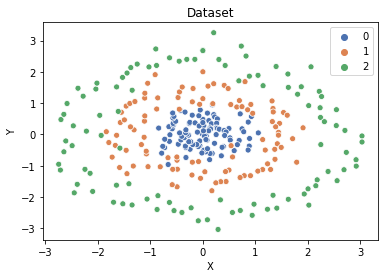

In [13]:
sns.scatterplot(x = X[:, 0], y = X[:, 1], hue = y_, palette = sns.color_palette('deep', K))
plt.title('Dataset')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [14]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [15]:
def cost_reg(theta, X, y, lam = 0):
    h = sigmoid(np.dot(X, theta))
    theta1 = theta.copy()
    theta1[0] = 0
    cos = -(np.sum(y * np.log(h)) + np.sum((1 - y) * np.log(1 - h)))/len(y) + lam * np.sum(theta1 * theta1)/len(y)
    return cos

In [16]:
def expand_feature(x1, x2, power = 2):
    #expand a 2D feature matrix to polynimial features up to the power
    new_x = np.ones((x1.shape[0], 1))
    for i in range(1, power + 1):
        for j in range(i + 1):
            new_x = np.append(new_x, (x1**(i-j)*(x2**j)).reshape(-1, 1), axis = 1)
    return new_x

In [17]:
def gradient_descent_reg(X, y, theta, alpha, lam = 0, num_iters = 100):
    costs = []

    for _ in range(num_iters):
        h = sigmoid(np.dot(X, theta))
        theta1 = theta.copy()
        theta1[0] = 0
        theta -= alpha * (np.dot(X.T, (h - y)) + 2 * lam * theta1)/len(y)
        costs.append(cost_reg(theta, X, y))
    return theta, costs

In [18]:
def predict_multi_class(theta, X):
    return np.argmax(sigmoid(np.dot(X, theta)), axis = 1)

def logistic_regression_reg_multi_class(X, y, power = 2, alpha = 0.01, lam = 0, num_iters = 100):
    X = expand_feature(X[:, 0], X[:, 1], power = power)
    theta = np.zeros((X.shape[1], y.shape[1]), dtype = np.float64)
    theta, costs = gradient_descent_reg(X, y, theta, alpha, lam, num_iters)
    predicted = predict_multi_class(theta, X)
    return predicted, theta, costs

In [19]:
num_iters = 1000
predicted, theta, costs = logistic_regression_reg_multi_class(X, y, alpha = 0.3, lam = 0, num_iters = num_iters)
print('The accuracy is {:.2f} %'.format(sum(predicted == y_)/len(y_)*100))

The accuracy is 92.33 %


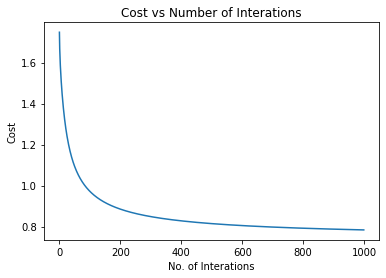

In [20]:
sns.lineplot(range(num_iters), costs)
plt.title('Cost vs Number of Interations')
plt.ylabel('Cost')
plt.xlabel('No. of Interations')
plt.show()

In [21]:
print('The accuracy is {:.2f} %'.format(sum(predicted == y_)/len(y_)*100))

The accuracy is 92.33 %


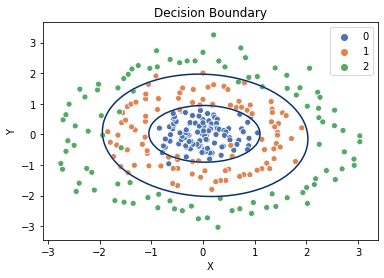

In [22]:
u = np.linspace(min(X[:, 0]),max(X[:, 0]), 50)  
v = np.linspace(min(X[:, 1]),max(X[:, 1]), 50)

for k in range(0, 3, 2):
    z = np.zeros((len(u),len(v)))
    for i in range(len(u)):
            for j in range(len(v)):
                z[i,j] = np.dot(expand_feature(u[i].reshape(1,-1),v[j].reshape(1,-1)),theta[:, k])   

    z = np.transpose(z)
    plt.contour(u,v,z,[0,0.01], cmap = "Blues")   
    
sns.scatterplot(x = X[:, 0], y = X[:, 1], hue = y_, palette = sns.color_palette('deep', K))
plt.title('Decision Boundary')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()